<a href="https://colab.research.google.com/github/pietrocfn02/deep_learning_project_serio/blob/main/Prove_tecniche_di_distruzione_pianeti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

dataset=pd.read_csv("drive/MyDrive/diabete/file.csv",header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Input Variables (columns index reported):>

**0.** Number of times pregnant 

**1.** Plasma glucose concentration a 2 hours in an oral glucose tolerance test 

**2.** Diastolic blood pressure (mm Hg) 

**3.** Triceps skin fold thickness (mm) 

**4.** 2-Hour serum insulin (mu U/ml) 

**5.** Body mass index (weight in kg/(height in m)^2) 

**6.** Diabetes pedigree function 

**7.** Age (years) 

In [18]:
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
dataset.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
dataset=dataset.values
x=dataset[:,0:8]
y=dataset[:,8]


In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [23]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
min_max_scaler.fit(x_train)

x_train=min_max_scaler.transform(x_train)
x_test=min_max_scaler.transform(x_test)

In [25]:
from keras.models import Sequential
from keras.layers import Dense

model =Sequential([
    Dense(8,activation="relu",input_shape=(x_train.shape[1],)),
    Dense(4,activation="relu"),
    Dense(2,activation="relu"),
    Dense(1,activation="sigmoid"),
])

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

hist=model.fit(x_train,y_train,batch_size=128,epochs=256,validation_split=0.3)

Epoch 1/256
4/4 [==============================] - 1s 66ms/step - loss: 0.5785 - accuracy: 0.6557 - val_loss: 0.6019 - val_accuracy: 0.6378
Epoch 2/256
4/4 [==============================] - 0s 16ms/step - loss: 0.5773 - accuracy: 0.6557 - val_loss: 0.6011 - val_accuracy: 0.6378
Epoch 3/256
4/4 [==============================] - 0s 16ms/step - loss: 0.5763 - accuracy: 0.6557 - val_loss: 0.6004 - val_accuracy: 0.6378
Epoch 4/256
4/4 [==============================] - 0s 10ms/step - loss: 0.5753 - accuracy: 0.6557 - val_loss: 0.5998 - val_accuracy: 0.6378
Epoch 5/256
4/4 [==============================] - 0s 10ms/step - loss: 0.5743 - accuracy: 0.6557 - val_loss: 0.5994 - val_accuracy: 0.6378
Epoch 6/256
4/4 [==============================] - 0s 10ms/step - loss: 0.5735 - accuracy: 0.6557 - val_loss: 0.5986 - val_accuracy: 0.6378
Epoch 7/256
4/4 [==============================] - 0s 10ms/step - loss: 0.5725 - accuracy: 0.6557 - val_loss: 0.5980 - val_accuracy: 0.6378
Epoch 8/256
4/4 [===

In [29]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8190


[0.44683459401130676, 0.818965494632721]

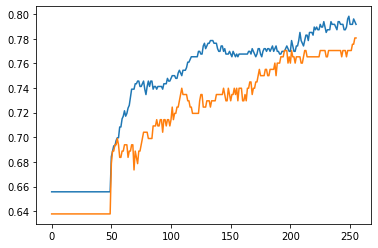

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()